In [1]:
import os
import numpy as np
import scipy as sc
import pandas as pd

In [2]:
os.chdir('/media/bramiozo/DATA-FAST/genetic_expression/cxb')
topn=200

In [3]:
# CD274, CD279, EGFR

## Gene expression

In [4]:
gene_diff_expression = pd.read_csv('cuffdiff_out/gene_exp.diff', sep='\t')

In [5]:
gene_diff_expression['ABSlog2fold_change'] = gene_diff_expression['log2(fold_change)'].abs()
top_pos = gene_diff_expression.loc[(gene_diff_expression.significant=='yes')
                        & (gene_diff_expression.value_1!=0) 
                        & (gene_diff_expression['log2(fold_change)']>0)
                        & (gene_diff_expression.value_2!=0)].sort_values(by='log2(fold_change)',
                                                                          ascending=False)[:topn].gene.tolist()
top_neg = gene_diff_expression.loc[(gene_diff_expression.significant=='yes')
                        & (gene_diff_expression.value_1!=0) 
                        & (gene_diff_expression['log2(fold_change)']<0)
                        & (gene_diff_expression.value_2!=0) ].sort_values(by='log2(fold_change)',
                                                                          ascending=True)[:topn].gene.tolist()
all_pos = gene_diff_expression.loc[(gene_diff_expression.significant=='yes')
                        & (gene_diff_expression.value_1!=0) 
                        & (gene_diff_expression.value_2!=0) 
                        & (gene_diff_expression['log2(fold_change)']>0)].gene.tolist()
all_neg = gene_diff_expression.loc[(gene_diff_expression.significant=='yes')
                        & (gene_diff_expression.value_1!=0) 
                        & (gene_diff_expression.value_2!=0) 
                        & (gene_diff_expression['log2(fold_change)']<0)].gene.tolist()

In [6]:
gene_diff_expression.gene_id.nunique()
gene_diff_expression.dropna(subset=['gene'], inplace=True)

In [7]:
gene_diff_expression.head()

,test_id,gene_id,gene,locus,sample_1,sample_2,status,value_1,value_2,log2(fold_change),test_stat,p_value,q_value,significant,ABSlog2fold_change
0,XLOC_000001,XLOC_000001,BX004987.1,GL000009.2:56139-58376,response,non_response,OK,0.956056,0.865543,-0.143491,-0.031596,0.81825,0.999897,no,0.143491
1,XLOC_000002,XLOC_000002,"AC145212.1,MAFIP",GL000194.1:53589-115055,response,non_response,OK,1.374780,2.160990,0.652496,0.175211,0.27310,0.999897,no,0.652496
2,XLOC_000003,XLOC_000003,AC011043.2,GL000195.1:173871-179372,response,non_response,NOTEST,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,no,0.000000
3,XLOC_000004,XLOC_000004,Y_RNA,GL000195.1:37433-37534,response,non_response,NOTEST,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,no,0.000000
4,XLOC_000005,XLOC_000005,AC011043.1,GL000195.1:42938-49164,response,non_response,NOTEST,0.004161,0.000000,-inf,0.000000,1.00000,1.000000,no,inf


In [8]:
gene_diff_expression['abs_diff'] = (gene_diff_expression['value_1']-gene_diff_expression['value_2']).abs()
gene_diff_expression['rel_abs_diff'] = gene_diff_expression['abs_diff']/\
                                        (gene_diff_expression[['value_1', 'value_2']].mean(axis=1))

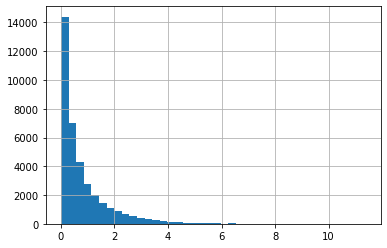

In [11]:
gene_diff_expression.loc[(gene_diff_expression.value_1!=0) & 
                         (gene_diff_expression.value_2!=0) , 'ABSlog2fold_change'].hist(bins=40)

In [80]:
gene_diff_expression[gene_diff_expression.gene.isin(['PD1','PDL1', 'CD274'])]

,test_id,gene_id,gene,locus,sample_1,sample_2,status,value_1,value_2,log2(fold_change),test_stat,p_value,q_value,significant,ABSlog2fold_change,abs_diff,rel_abs_diff
57505,XLOC_057506,XLOC_057506,CD274,chr9:5450502-5833117,response,non_response,OK,13.0651,5.85391,-1.15825,-0.152844,0.0575,0.623017,no,1.15825,7.21119,0.762322


In [12]:
significant = dict()
significant['gene_expression'] = gene_diff_expression.loc[(gene_diff_expression.significant=='yes')
                        & (gene_diff_expression.value_1!=0) 
                        & (gene_diff_expression.value_2!=0) ].sort_values(by='ABSlog2fold_change',
                                                                          ascending=False)
significant['gene_expression'].set_index('gene_id', inplace=True)
significant['gene_expression'].to_csv('rna_expression_diff.csv',sep='\t')

## Isoforms 

In [13]:
isoforms_diff_expression = pd.read_csv('cuffdiff_out/isoform_exp.diff', sep='\t')

In [14]:
isoforms_diff_expression['ABSlog2fold_change'] = isoforms_diff_expression['log2(fold_change)'].abs()
top_pos.extend(isoforms_diff_expression.loc[(isoforms_diff_expression.p_value<0.001) & 
                             (isoforms_diff_expression.value_1!=0) & 
                             (isoforms_diff_expression['log2(fold_change)']>0) &
                             (isoforms_diff_expression.value_2!=0)].sort_values(by='log2(fold_change)',
                                                                          ascending=False)[:topn].gene.tolist())
top_neg.extend(isoforms_diff_expression.loc[(isoforms_diff_expression.p_value<0.001) & 
                             (isoforms_diff_expression.value_1!=0) & 
                             (isoforms_diff_expression['log2(fold_change)']<0) &
                             (isoforms_diff_expression.value_2!=0)].sort_values(by='log2(fold_change)',
                                                                          ascending=True)[:topn].gene.tolist())

all_pos.extend(isoforms_diff_expression.loc[(isoforms_diff_expression.p_value<0.001)
                        & (isoforms_diff_expression.value_1!=0) 
                        & (isoforms_diff_expression.value_2!=0) 
                        & (isoforms_diff_expression['log2(fold_change)']>0)].gene.tolist())
all_neg.extend(isoforms_diff_expression.loc[(isoforms_diff_expression.p_value<0.001)
                        & (isoforms_diff_expression.value_1!=0) 
                        & (isoforms_diff_expression.value_2!=0) 
                        & (isoforms_diff_expression['log2(fold_change)']<0)].gene.tolist())

In [15]:
significant['isoform_diff_expression'] = isoforms_diff_expression.loc[(isoforms_diff_expression.p_value<0.001) 
                                    & (isoforms_diff_expression.value_1!=0) 
                                    & (isoforms_diff_expression.value_2!=0)].sort_values(by='ABSlog2fold_change',
                                                                                      ascending=False)
significant['isoform_diff_expression'].set_index('gene_id', inplace=True)
significant['isoform_diff_expression'].to_csv('isoform_expression_diff.csv',sep='\t')

In [16]:
isoforms_diff_expression[isoforms_diff_expression.gene.isin(['PD1','PDL1', 'CD274'])]

,test_id,gene_id,gene,locus,sample_1,sample_2,status,value_1,value_2,log2(fold_change),test_stat,p_value,q_value,significant,ABSlog2fold_change
302636,TCONS_00303377,XLOC_057506,CD274,chr9:5450502-5833117,response,non_response,OK,1.167600,0.332717,-1.811180,-0.073309,0.15995,1.0,no,1.811180
302637,TCONS_00303378,XLOC_057506,CD274,chr9:5450502-5833117,response,non_response,NOTEST,0.151368,0.048955,-1.628540,0.000000,1.00000,1.0,no,1.628540
302638,TCONS_00303379,XLOC_057506,CD274,chr9:5450502-5833117,response,non_response,NOTEST,0.104005,0.134605,0.372077,0.000000,1.00000,1.0,no,0.372077
302639,TCONS_00303380,XLOC_057506,CD274,chr9:5450502-5833117,response,non_response,OK,6.722040,2.557820,-1.393980,-0.279510,0.15355,1.0,no,1.393980
302640,TCONS_00303381,XLOC_057506,CD274,chr9:5450502-5833117,response,non_response,NOTEST,0.482647,0.028846,-4.064540,0.000000,1.00000,1.0,no,4.064540
302641,TCONS_00303382,XLOC_057506,CD274,chr9:5450502-5833117,response,non_response,OK,3.370360,1.602800,-1.072310,-0.049455,0.33435,1.0,no,1.072310
302642,TCONS_00303383,XLOC_057506,CD274,chr9:5450502-5833117,response,non_response,OK,1.067100,1.148160,0.105631,0.004121,0.91235,1.0,no,0.105631


## TSS

In [17]:
tss_diff_expression = pd.read_csv('cuffdiff_out/tss_group_exp.diff', sep='\t')
tss_diff_expression = tss_diff_expression.loc[tss_diff_expression.status=="OK"]

In [18]:
tss_diff_expression['ABSlog2fold_change'] = tss_diff_expression['log2(fold_change)'].abs()
top_pos.extend(tss_diff_expression.loc[(tss_diff_expression.p_value<0.001) & 
                             (tss_diff_expression.value_1!=0) & 
                             (tss_diff_expression['log2(fold_change)']>0) &
                             (tss_diff_expression.value_2!=0)].sort_values(by='log2(fold_change)',
                                                                          ascending=False)[:topn].gene.tolist())
top_neg.extend(tss_diff_expression.loc[(tss_diff_expression.p_value<0.001) & 
                             (tss_diff_expression.value_1!=0) & 
                             (tss_diff_expression['log2(fold_change)']<0) &          
                             (tss_diff_expression.value_2!=0)].sort_values(by='log2(fold_change)',
                                                                          ascending=True)[:topn].gene.tolist())

all_pos.extend(tss_diff_expression.loc[(tss_diff_expression.p_value<0.001)
                        & (tss_diff_expression.value_1!=0) 
                        & (tss_diff_expression.value_2!=0) 
                        & (tss_diff_expression['log2(fold_change)']>0)].gene.tolist())
all_neg.extend(tss_diff_expression.loc[(tss_diff_expression.p_value<0.001)
                        & (tss_diff_expression.value_1!=0) 
                        & (tss_diff_expression.value_2!=0) 
                        & (tss_diff_expression['log2(fold_change)']<0)].gene.tolist())

In [19]:
significant['tss_diff_expression']=tss_diff_expression.loc[(tss_diff_expression.p_value<0.001) & 
                             (tss_diff_expression.value_1!=0) & 
                             (tss_diff_expression.value_2!=0)].sort_values(by='ABSlog2fold_change',
                                                                          ascending=False)
significant['tss_diff_expression'].to_csv('tss_expression_diff.csv',sep='\t')

In [20]:
tss_diff_expression[tss_diff_expression.gene.isin(['PD1','PDL1', 'CD274'])]

,test_id,gene_id,gene,locus,sample_1,sample_2,status,value_1,value_2,log2(fold_change),test_stat,p_value,q_value,significant,ABSlog2fold_change
47005,TSS142301,XLOC_057506,CD274,chr9:5450502-5833117,response,non_response,OK,8.14501,3.07410,-1.405750,-0.273228,0.06720,1.0,no,1.405750
47007,TSS142303,XLOC_057506,CD274,chr9:5450502-5833117,response,non_response,OK,3.37036,1.60280,-1.072310,-0.049455,0.33435,1.0,no,1.072310
47008,TSS142304,XLOC_057506,CD274,chr9:5450502-5833117,response,non_response,OK,1.06710,1.14816,0.105631,0.004121,0.91235,1.0,no,0.105631


## CDS

In [21]:
cds_diff_expression = pd.read_csv('cuffdiff_out/cds_exp.diff', sep='\t')


In [22]:
cds_diff_expression['ABSlog2fold_change'] = cds_diff_expression['log2(fold_change)'].abs()
top_pos.extend(cds_diff_expression[(cds_diff_expression.status=='OK') & 
                     (cds_diff_expression.value_1!=0) &
                     (cds_diff_expression.value_2!=0) &
                     (cds_diff_expression['log2(fold_change)']>0) &
                     (cds_diff_expression.p_value<0.01)].sort_values(by='log2(fold_change)',
                                                                      ascending=False)[:topn].gene.tolist())
top_neg.extend(cds_diff_expression[(cds_diff_expression.status=='OK') & 
                     (cds_diff_expression.value_1!=0) &
                     (cds_diff_expression.value_2!=0) &
                     (cds_diff_expression['log2(fold_change)']<0) &             
                     (cds_diff_expression.p_value<0.01)].sort_values(by='log2(fold_change)',
                                                                      ascending=True)[:topn].gene.tolist())

all_pos.extend(cds_diff_expression.loc[(cds_diff_expression.status=='OK')
                        & (cds_diff_expression.value_1!=0) 
                        & (cds_diff_expression.value_2!=0) 
                        & (cds_diff_expression['log2(fold_change)']>0)].gene.tolist())
all_neg.extend(cds_diff_expression.loc[(cds_diff_expression.status=='OK')
                        & (cds_diff_expression.value_1!=0) 
                        & (cds_diff_expression.value_2!=0) 
                        & (cds_diff_expression['log2(fold_change)']<0)].gene.tolist())

In [23]:
significant['cds_diff_expression'] = cds_diff_expression[(cds_diff_expression.status=='OK') & 
                     (cds_diff_expression.value_1!=0) &
                     (cds_diff_expression.value_2!=0) &
                     (cds_diff_expression.p_value<0.01)].sort_values(by='ABSlog2fold_change',
                                                                      ascending=False)
significant['cds_diff_expression'].to_csv('cds_expression_diff.csv',sep='\t')

In [24]:
cds_diff_expression[cds_diff_expression.gene.isin(['PD1','PDL1', 'CD274'])]

,test_id,gene_id,gene,locus,sample_1,sample_2,status,value_1,value_2,log2(fold_change),test_stat,p_value,q_value,significant,ABSlog2fold_change
90422,P91379,XLOC_057506,CD274,chr9:5450502-5833117,response,non_response,OK,6.722040,2.557820,-1.393980,-0.27951,0.15355,0.999975,no,1.393980
90424,P91380,XLOC_057506,CD274,chr9:5450502-5833117,response,non_response,NOTEST,0.104005,0.134605,0.372077,0.00000,1.00000,1.000000,no,0.372077


## Splicing & promotor

In [21]:
splicing_diff_expression = pd.read_csv('splicing.diff', sep='\t')

In [22]:
splicing_diff_expression.loc[(splicing_diff_expression.p_value<0.01)]

,test_id,gene_id,gene,locus,sample_1,sample_2,status,value_1,value_2,sqrt(JS),test_stat,p_value,q_value,significant
20226,TSS118200,XLOC_047384,"AC008575.1,APC",chr5:112707497-112922289,response,non_response,OK,0.0,0.0,0.402652,0.0,0.00195,1.0,no
69627,TSS25382,XLOC_011253,ITIH2,chr10:7703315-7749520,response,non_response,OK,0.0,0.0,0.681549,0.0,0.00085,1.0,no
75359,TSS30540,XLOC_013464,CD81,chr11:2328748-2397397,response,non_response,OK,0.0,0.0,0.506690,0.0,0.00825,1.0,no
82276,TSS36767,XLOC_015833,CHKA,chr11:68039024-68121444,response,non_response,OK,0.0,0.0,0.530674,0.0,0.00140,1.0,no
88273,TSS42163,XLOC_017857,FZD10,chr12:130162458-130165740,response,non_response,OK,0.0,0.0,0.329999,0.0,0.00310,1.0,no
109718,TSS61464,XLOC_025599,MT1H,chr16:56669813-56671129,response,non_response,OK,0.0,0.0,0.465990,0.0,0.00035,1.0,no
123724,TSS7407,XLOC_003416,B2M,KI270849.1:34825-42225,response,non_response,OK,0.0,0.0,0.514004,0.0,0.00070,1.0,no
129866,TSS79599,XLOC_032051,HIF3A,chr19:46297041-46343433,response,non_response,OK,0.0,0.0,0.360600,0.0,0.00520,1.0,no


In [23]:
promotor_diff_expression = pd.read_csv('promoters.diff', sep='\t')
promotor_diff_expression.loc[(promotor_diff_expression.p_value<0.01)]

,test_id,gene_id,gene,locus,sample_1,sample_2,status,value_1,value_2,sqrt(JS),test_stat,p_value,q_value,significant
417,XLOC_000418,XLOC_000418,"HLA-B,HLA-C",GL000251.2:2749674-2837604,response,non_response,OK,0,0,0.353765,0,0.00825,1.000000,no
3415,XLOC_003416,XLOC_003416,B2M,KI270849.1:34825-42225,response,non_response,OK,0,0,0.384037,0,0.00920,1.000000,no
6450,XLOC_006451,XLOC_006451,CEP85,chr1:26234199-26278808,response,non_response,OK,0,0,0.349395,0,0.00845,1.000000,no
6732,XLOC_006733,XLOC_006733,RPS8,chr1:44739817-44778779,response,non_response,OK,0,0,0.328564,0,0.00005,0.105920,no
7268,XLOC_007269,XLOC_007269,"GSTM1,GSTM2,GSTM4",chr1:109656098-109709551,response,non_response,OK,0,0,0.352291,0,0.00005,0.105920,no
9467,XLOC_009468,XLOC_009468,"DAB1,OMA1",chr1:56929206-58563897,response,non_response,OK,0,0,0.276915,0,0.00050,0.588444,no
15258,XLOC_015259,XLOC_015259,"SERGEF,TPH1",chr11:17734773-18042426,response,non_response,OK,0,0,0.289891,0,0.00975,1.000000,no
15262,XLOC_015263,XLOC_015263,"SAA2,SAA2-SAA4,SAA4",chr11:18231354-18248668,response,non_response,OK,0,0,0.346350,0,0.00545,1.000000,no
22878,XLOC_022879,XLOC_022879,"AC124312.1,SNRPN,SNURF",chr15:24101826-25439051,response,non_response,OK,0,0,0.243134,0,0.00100,0.962909,no
26037,XLOC_026038,XLOC_026038,LMF1,chr16:817488-981596,response,non_response,OK,0,0,0.360324,0,0.00005,0.105920,no


In [25]:
set(top_neg)

{'ABI3BP',
 'AC004817.3',
 'AC006058.1',
 'AC007271.1',
 'AC007923.1',
 'AC008105.3',
 'AC009313.1',
 'AC010327.2,DNAAF3,TNNI3',
 'AC012339.1',
 'AC013477.1,TRIM2',
 'AC016590.4',
 'AC083977.1,NRG1',
 'AC084123.1,MIR1204,MIR1206,MIR1207,PVT1,RNVU1-32',
 'AC093838.1',
 'AC097512.1',
 'AC097717.1',
 'AC100822.1',
 'AC108063.2',
 'AC108690.1',
 'AC114786.1',
 'AC129926.2',
 'AC211486.4,GTF2IP1',
 'AC270272.2',
 'ADAM33',
 'ADAMTSL1',
 'ADARB1',
 'AL078622.1',
 'AL135999.3',
 'AL136114.1',
 'AL136309.1',
 'AL139042.1',
 'AL158210.1,AL392086.1,AL392086.2,LINC00707,LINP1',
 'AL392086.1,LINC00707',
 'AL606500.1',
 'AL929091.1',
 'ALDH1A2',
 'ANKRD33',
 'APLP1',
 'ARHGAP22',
 'ARHGAP29',
 'ARNTL2',
 'ATP8B3',
 'BLID',
 'BMP4',
 'BPIFB1',
 'BPIFB2',
 'BRD2',
 'C11orf97',
 'C20orf85',
 'C2orf16',
 'C5AR2',
 'CACNA1E',
 'CCBE1',
 'CCDC141,TTN',
 'CCDC78',
 'CCL17',
 'CEACAM19,PVR',
 'CEACAM3',
 'CFAP299,FGF5',
 'CKM',
 'CLDN8',
 'CMYA5',
 'COLEC11',
 'CRH',
 'CSF3',
 'CSF3R',
 'CST1',
 'CST4',
 '